# Breast Cancer Prediction

### OBJECTIVE:

#### The objective of this project is to create a predictive model that can accurately classify breast cancer cases as benign or malignant based on a set of relevant features. By leveraging historical data and applying machine learning techniques, we aim to develop a reliable tool for assisting medical professionals in diagnosing breast cancer.

### Import the relevent libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

### Import the Dataset

In [2]:
df = pd.read_csv("Cancer_data.csv",encoding='ISO-8859-1')
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
pd.set_option('display.max_columns',34)

In [5]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Exploratory Data Analysis (EDA)

#### Describing object Features

In [7]:
data = df.copy()

In [8]:
data['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### Benign(Noncancerous) Tumours
#### A benign tumor is made up of cells that don't threaten to invade other tissues. The tumor cells are contained within the tumor and aren't abnormal or very different from surrounding cells.

### Malignant (Cancerous) Tumors
#### Malignant tumors are made of cancer cells that can grow uncontrollably and invade nearby tissues. The cancer cells in a malignant tumor tend to be abnormal and very different from the normal surrounding tissue.

In [9]:
data.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Data Visualization

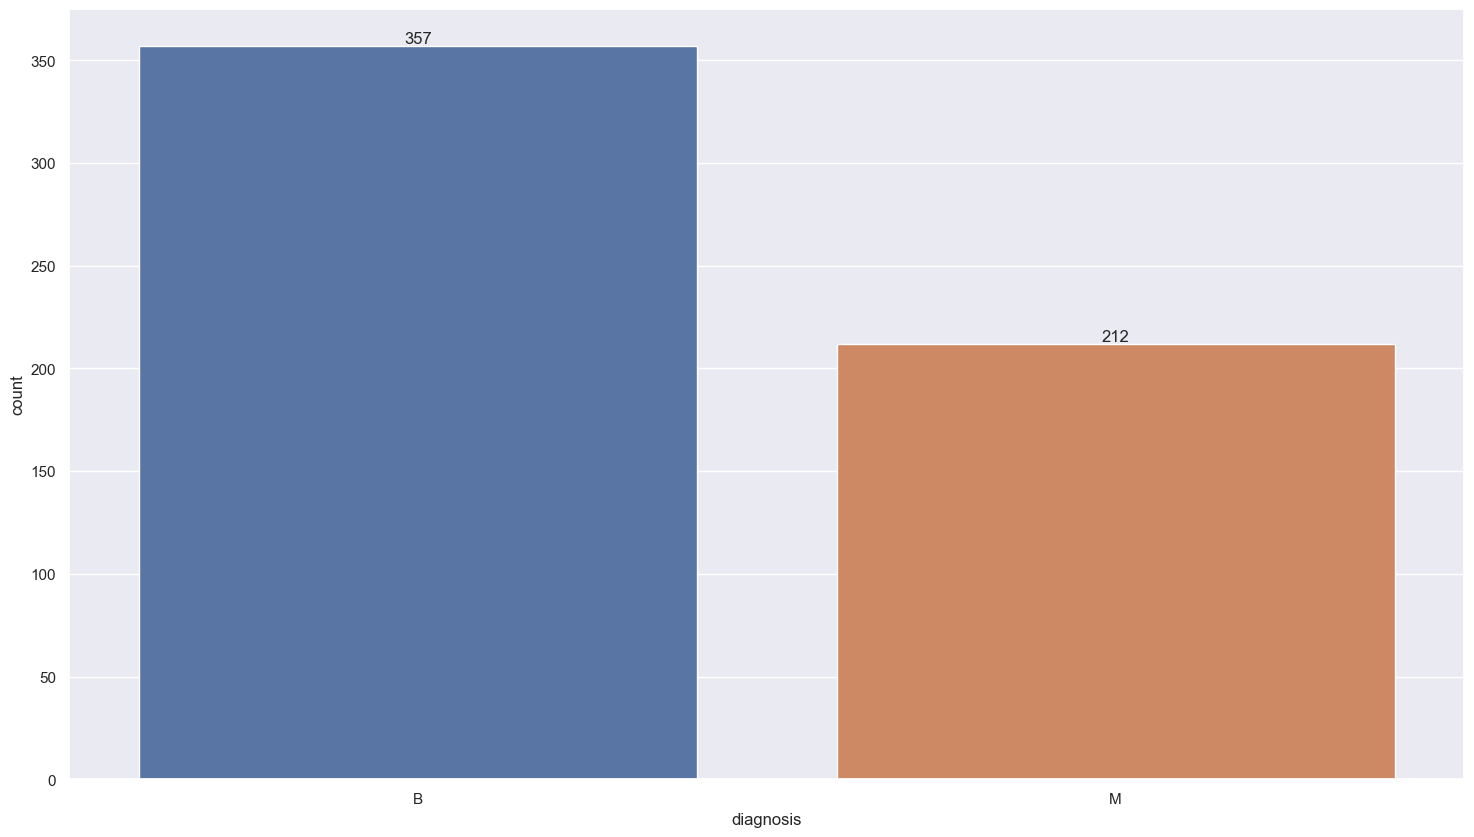

In [10]:
plt.figure(figsize = (18,10))
ax1 = sns.countplot(x=data['diagnosis'],order=data['diagnosis'].value_counts(ascending=False).index)
abs_values1 = data['diagnosis'].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0], labels=abs_values1)

plt.show()

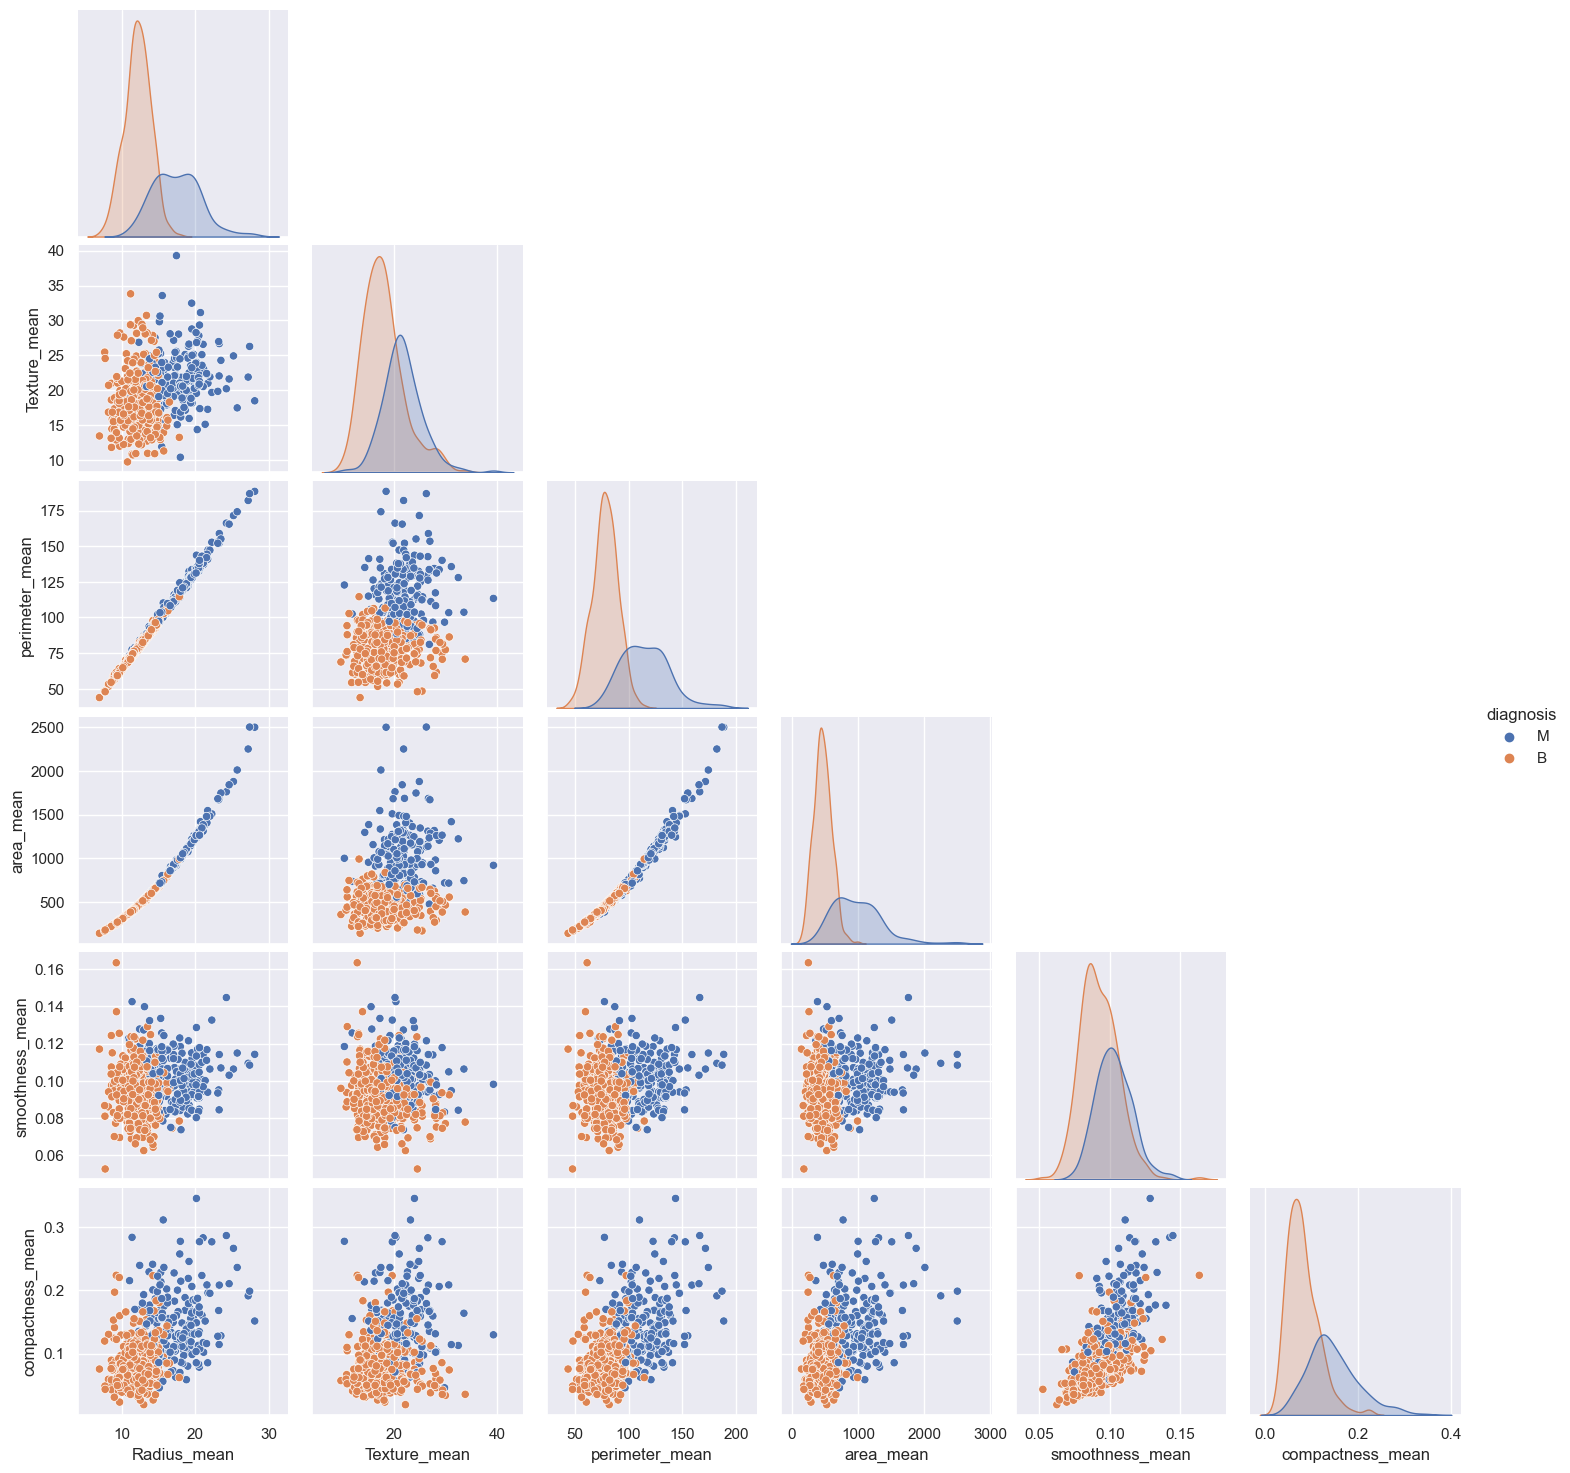

In [11]:
col1 = ['diagnosis','Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean']

sns.pairplot(data[col1], hue ="diagnosis", corner=True)
plt.show()

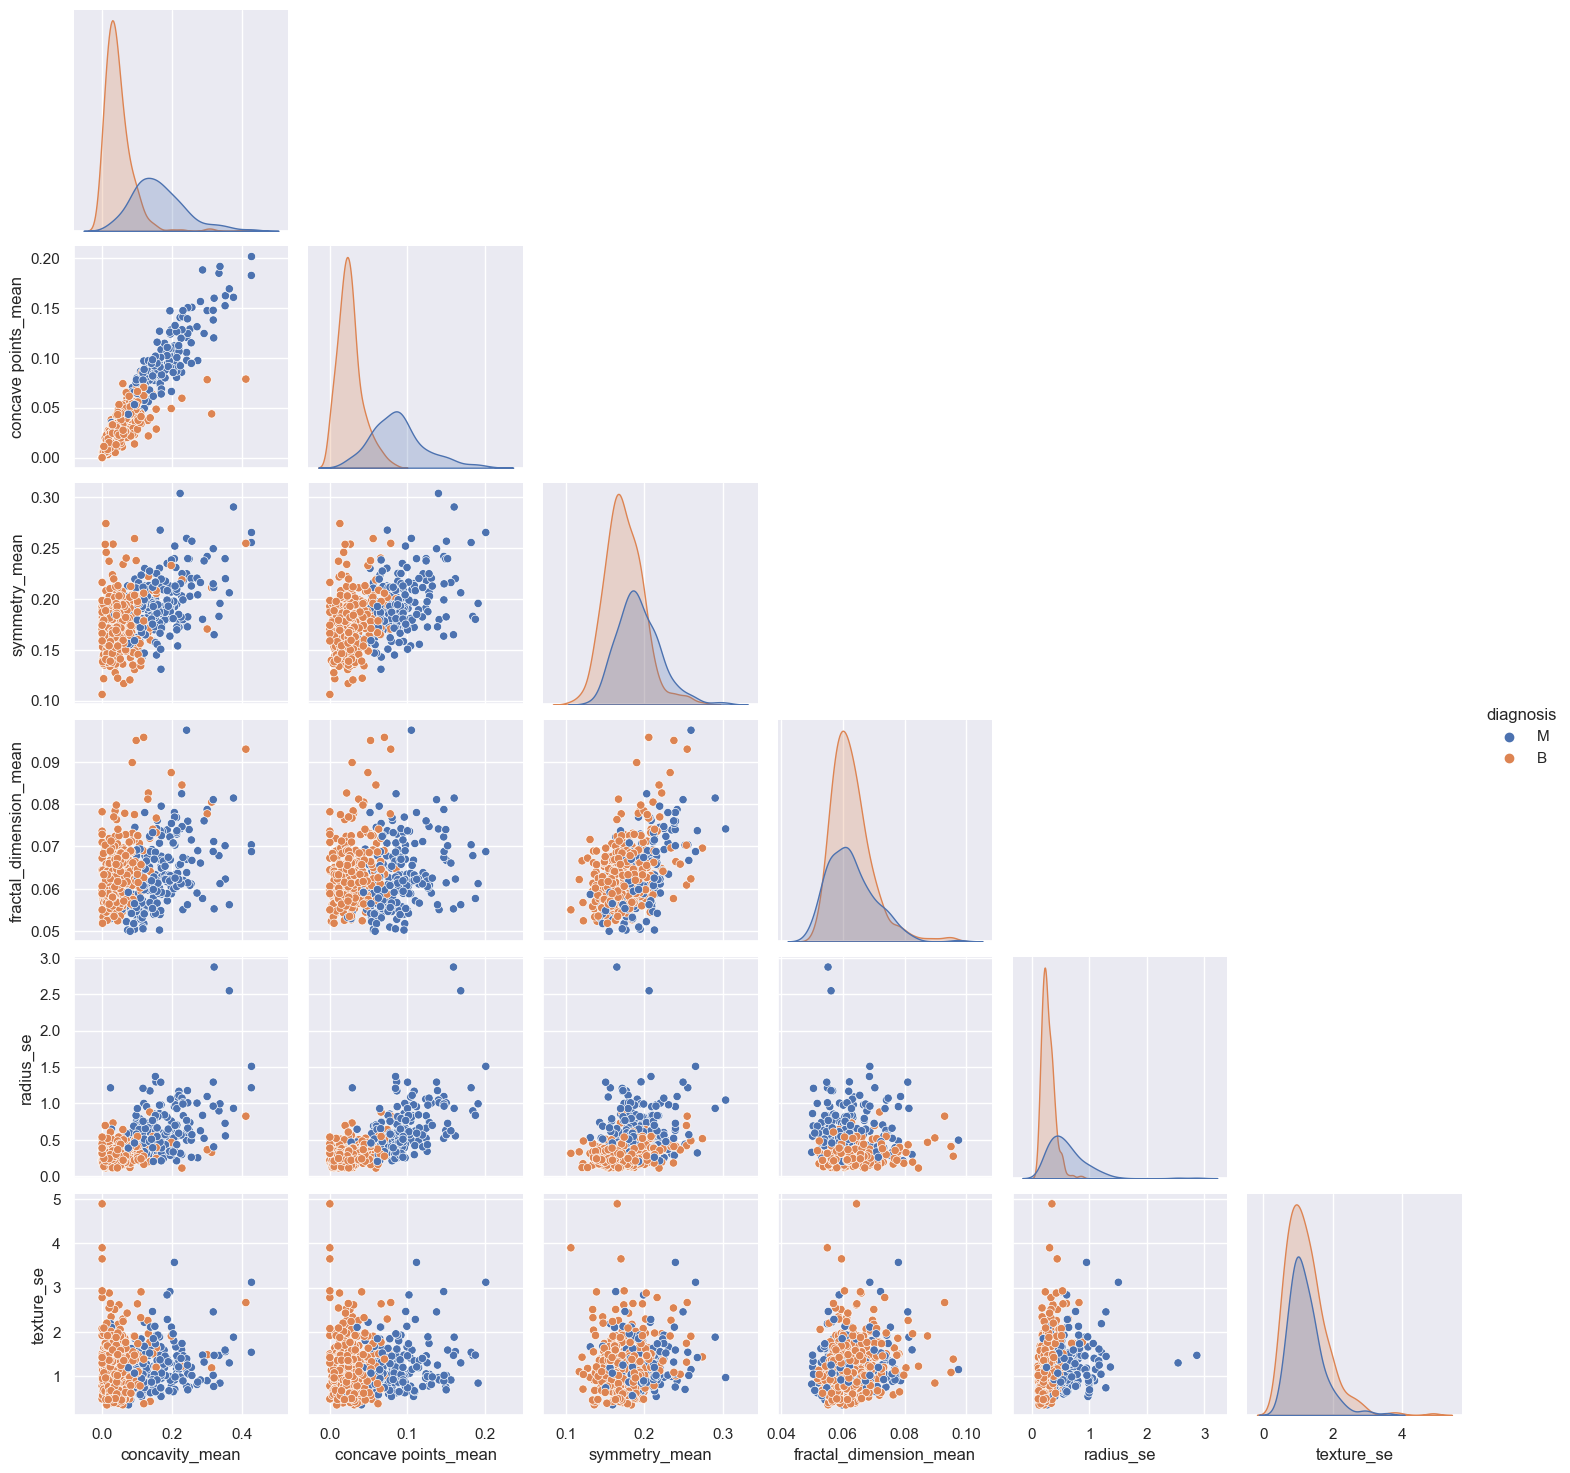

In [12]:
col2 =['diagnosis','concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se']
sns.pairplot(data[col2], hue ="diagnosis", corner=True)
plt.show()

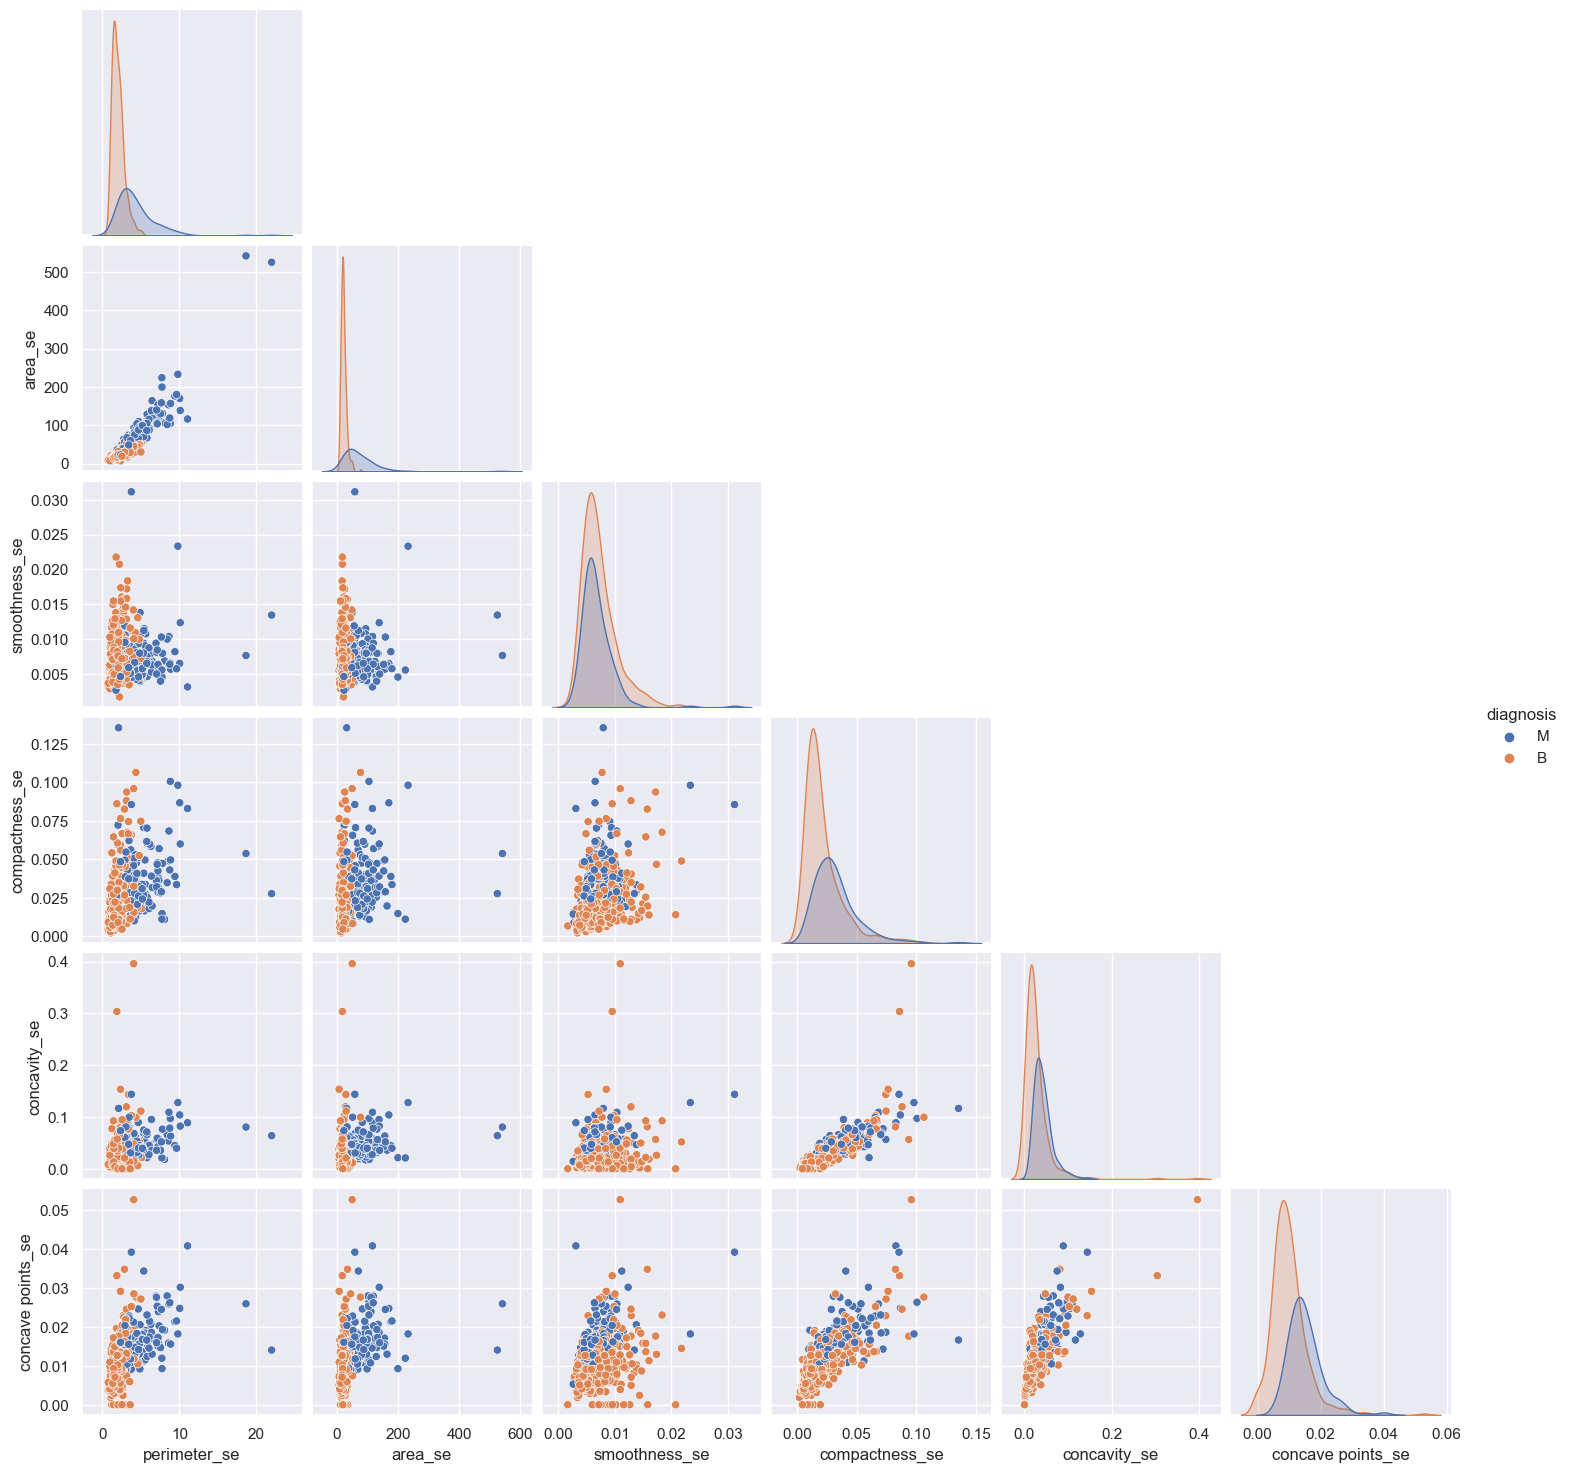

In [13]:
col3 = ['diagnosis','perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se']

sns.pairplot(data[col3], hue ="diagnosis", corner=True)
plt.show()

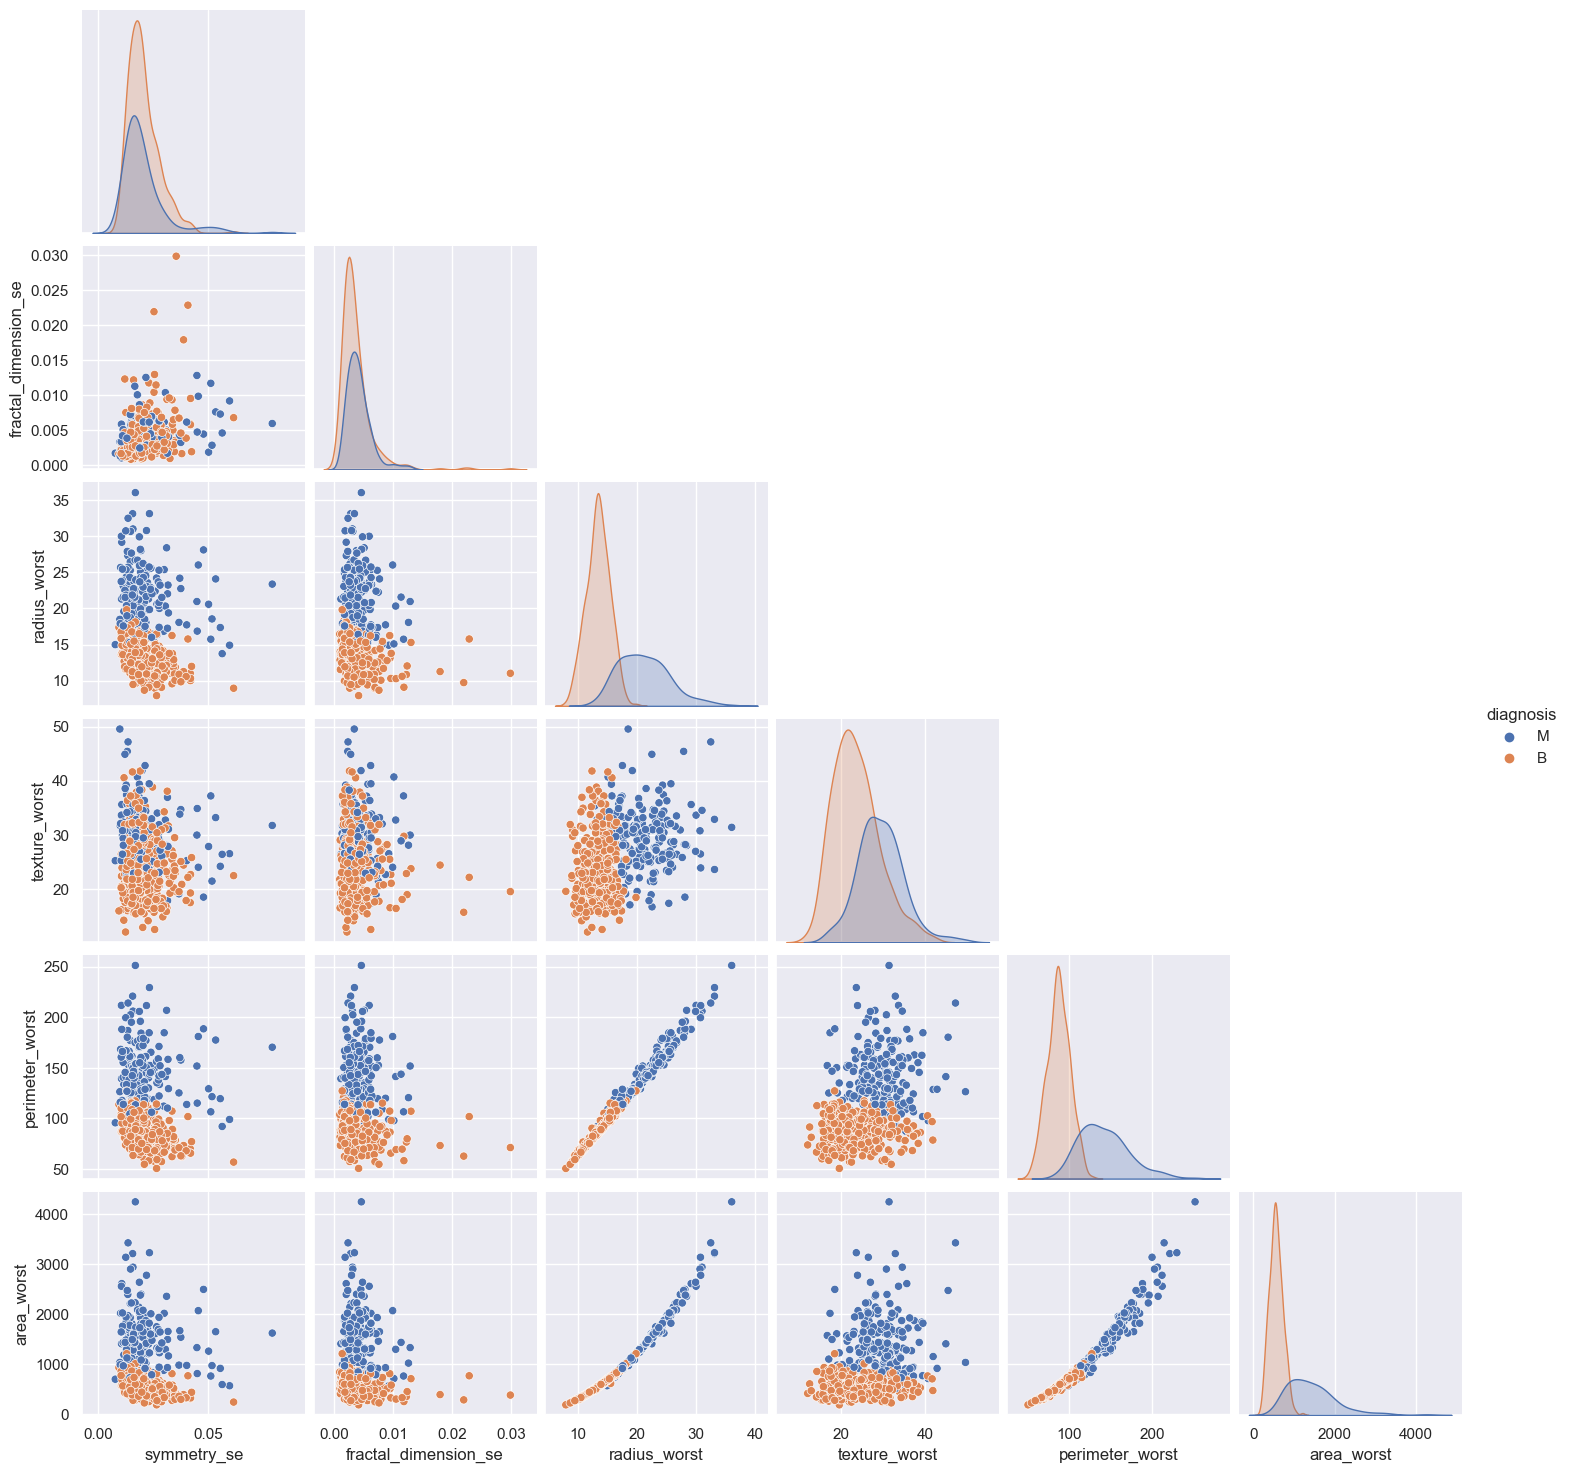

In [14]:
col4 =['diagnosis','symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst']

sns.pairplot(data[col4], hue ="diagnosis", corner=True)
plt.show()

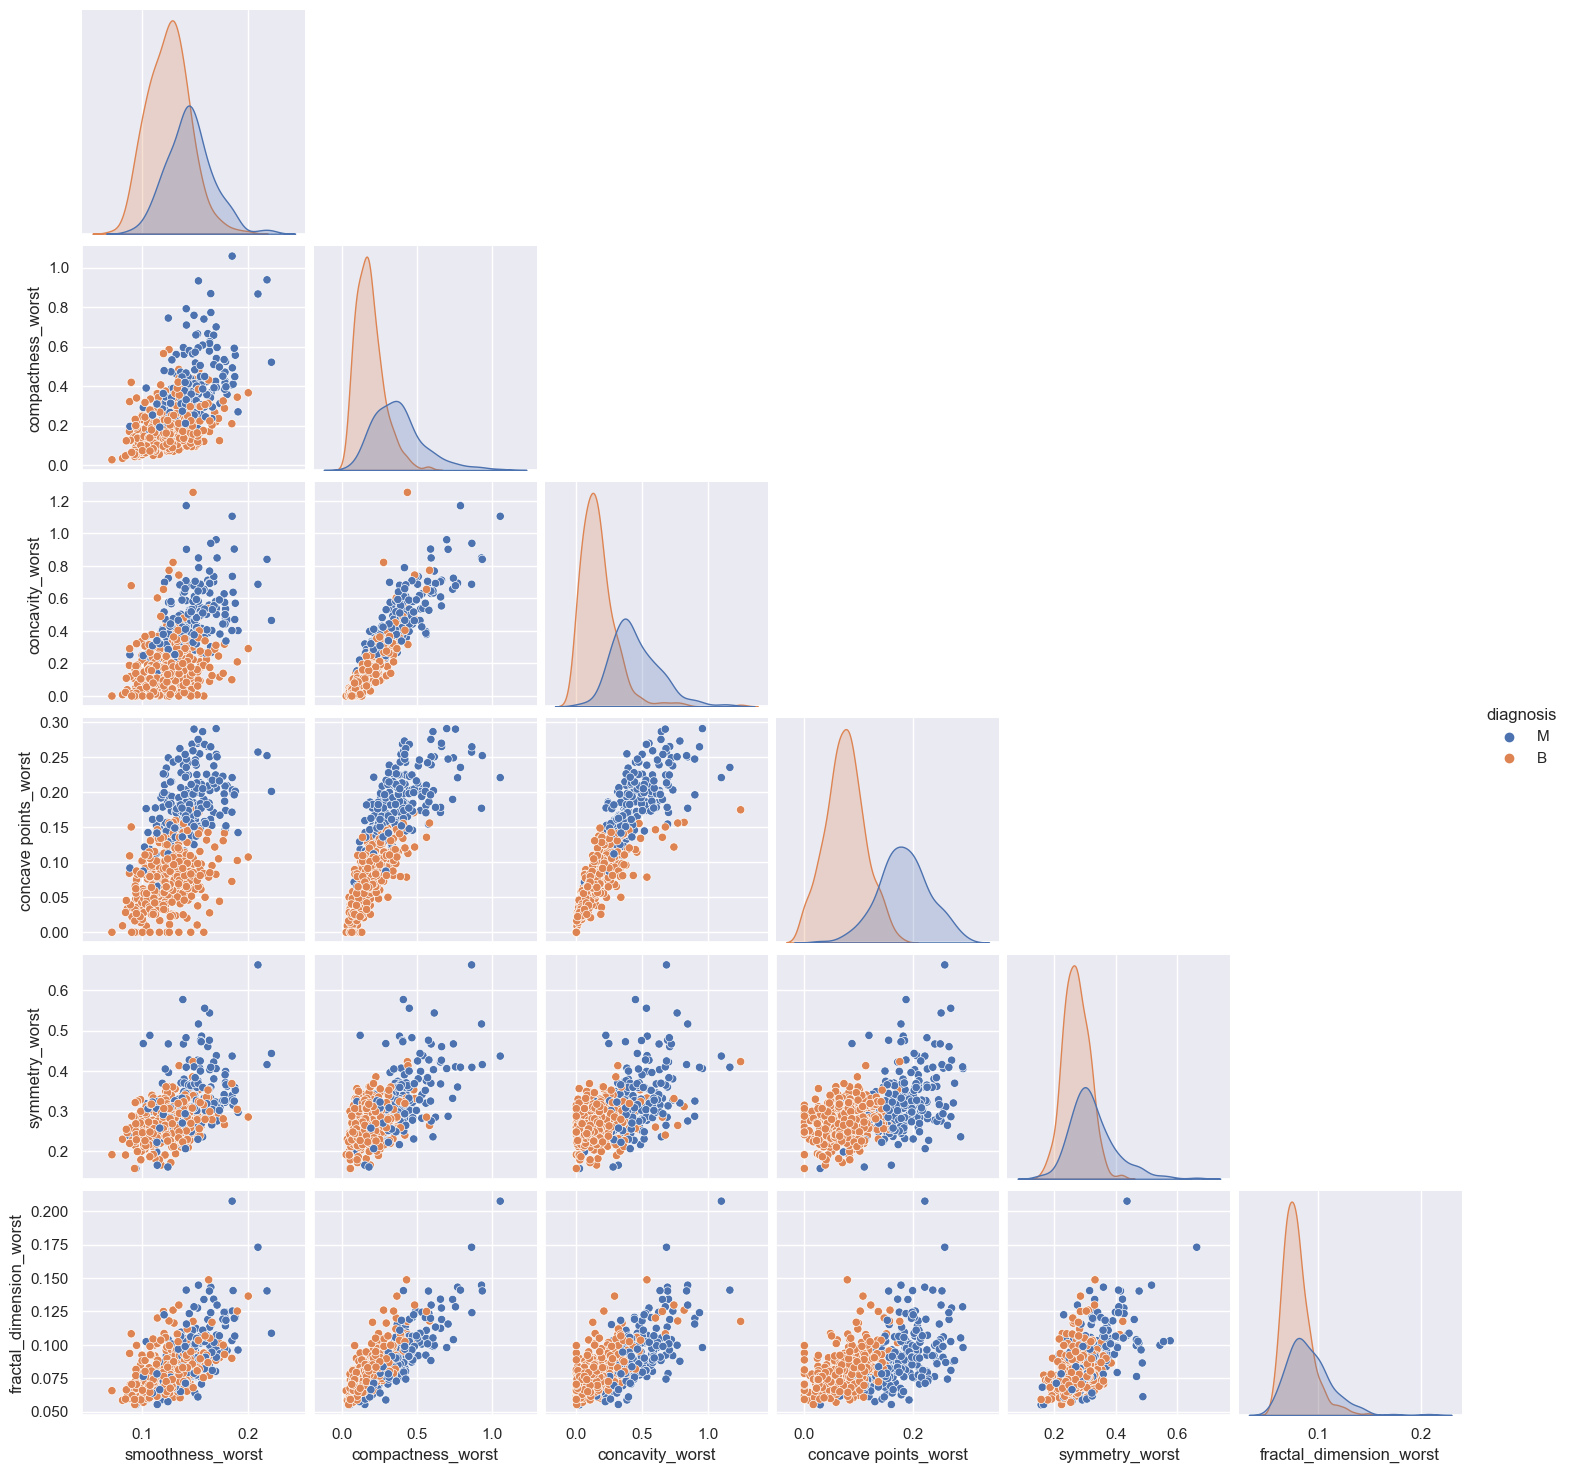

In [15]:
col5 =['diagnosis','smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

sns.pairplot(data[col5], hue ="diagnosis", corner=True)
plt.show()

In [16]:
data['diagnosis'] = np.where(data['diagnosis'] == "M", 1, 0)
data.head(2)

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,21.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [17]:
data.diagnosis.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int32
dtypes: int32(1)
memory usage: 2.4 KB


### Heatmap

<Axes: title={'center': 'Correlation Graph'}>

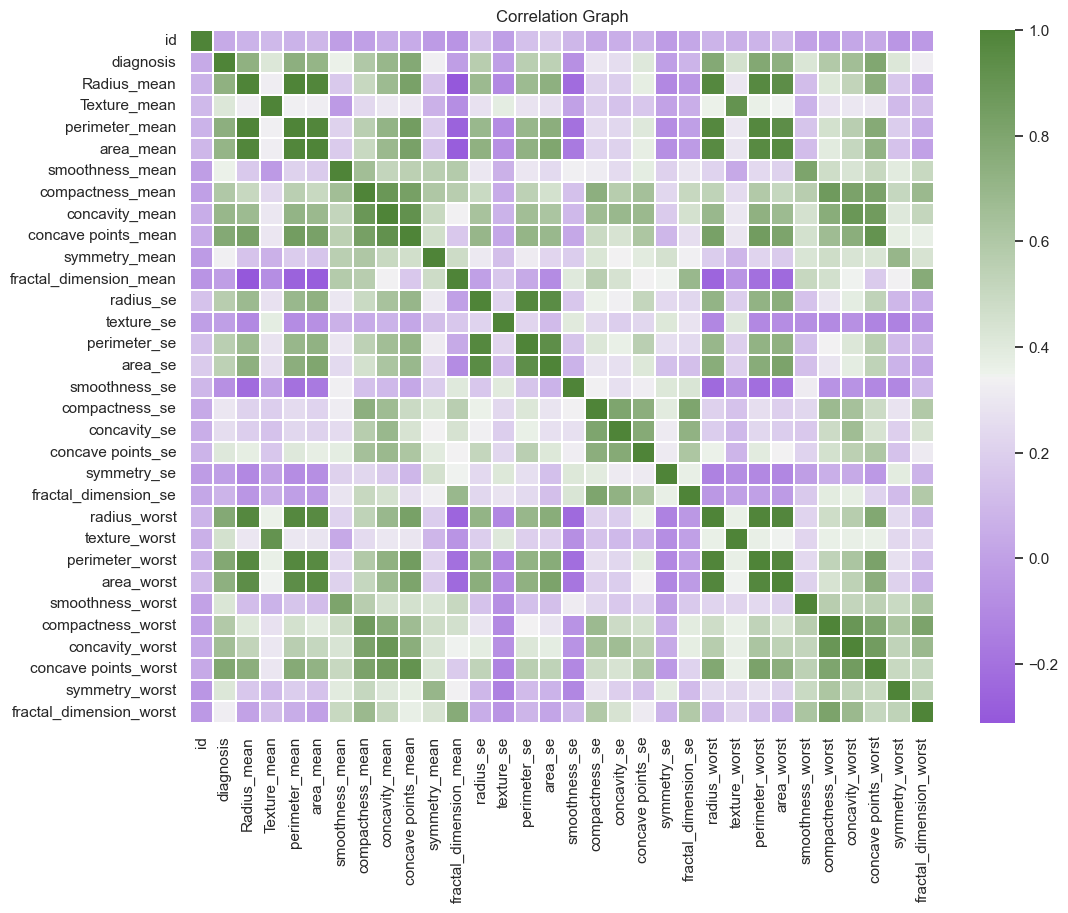

In [18]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data.corr(), annot=False, fmt='.1%',  linewidths=.05, cmap=cmap)

### Variance inflation Factor (VIF)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant  

In [20]:
X = add_constant(data)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)  

const                      1945.329905
id                            1.099150
diagnosis                     4.435104
Radius_mean                3817.832971
Texture_mean                 11.720919
perimeter_mean             3792.350827
area_mean                   348.099248
smoothness_mean               8.196794
compactness_mean             51.476334
concavity_mean               71.020365
concave points_mean          60.183160
symmetry_mean                 4.230351
fractal_dimension_mean       15.757076
radius_se                    75.862078
texture_se                    4.199652
perimeter_se                 70.397563
area_se                      41.763890
smoothness_se                 4.097180
compactness_se               15.370282
concavity_se                 15.919483
concave points_se            11.670464
symmetry_se                   5.189875
fractal_dimension_se          9.733398
radius_worst                816.029735
texture_worst                18.290508
perimeter_worst          

#### Note: Most of the columns are redundent which is showing high Multicolinearity, Such columns has to be remove from the analysis.

In [21]:
cols = ['id','Radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','radius_se','area_se',
       'radius_worst','perimeter_worst','area_worst','texture_worst','compactness_se','compactness_worst','smoothness_worst','concavity_worst','concave points_worst']

In [22]:
data_drop = data.drop(cols, axis = 1)

In [23]:
data_drop.shape

(569, 15)

In [24]:
data_drop.head(2)

,diagnosis,Texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.14710,0.2419,0.07871,0.9053,8.589,0.006399,0.05373,0.01587,0.03003,0.006193,0.4601,0.11890
1,1,21.77,0.08474,0.07017,0.1812,0.05667,0.7339,3.398,0.005225,0.01860,0.01340,0.01389,0.003532,0.2750,0.08902


In [25]:
X = add_constant(data_drop)  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)  

const                      210.557468
diagnosis                    3.666877
Texture_mean                 1.737351
smoothness_mean              3.331289
concave points_mean          6.004111
symmetry_mean                3.313910
fractal_dimension_mean       6.995875
texture_se                   1.987430
perimeter_se                 2.853468
smoothness_se                1.933301
concavity_se                 3.648816
concave points_se            4.017356
symmetry_se                  3.292092
fractal_dimension_se         4.889784
symmetry_worst               5.842015
fractal_dimension_worst      7.322157
dtype: float64


<Axes: title={'center': 'Correlation Graph'}>

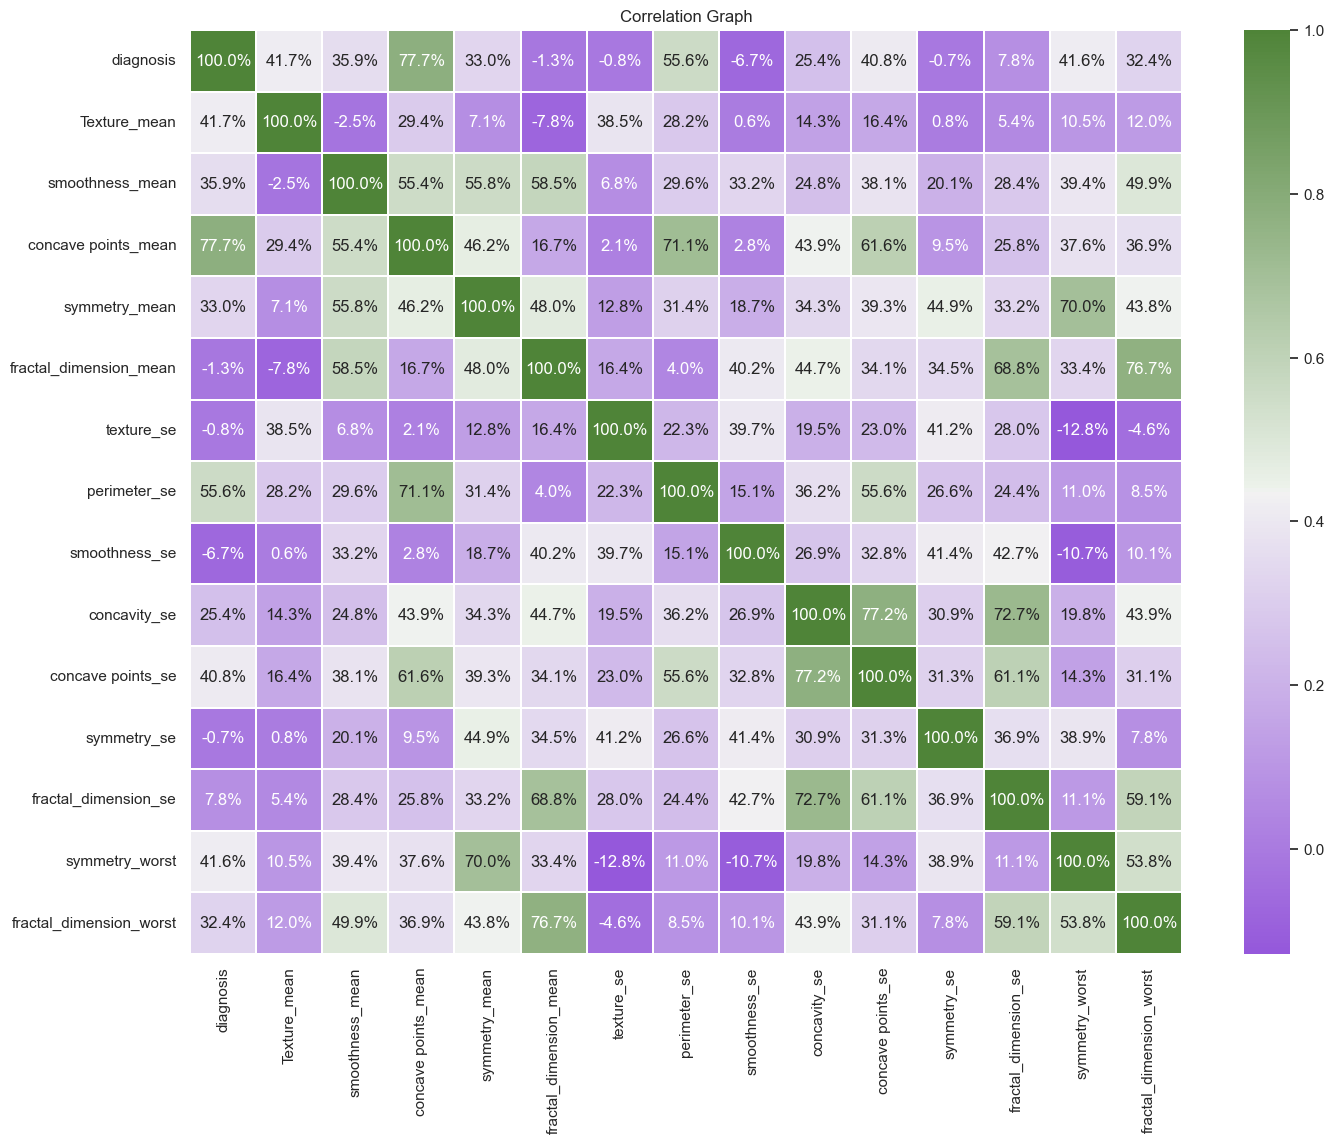

In [26]:
plt.figure(figsize=(16, 12))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data_drop.corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap)

## Model Implementation

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

In [30]:
X = data_drop.drop(['diagnosis'], axis = 1)
Y = data_drop['diagnosis']

In [31]:
# Scaling the data
sc = StandardScaler()
X_scale = sc.fit_transform(X)
X = pd.DataFrame(X_scale)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101, stratify=Y)

## Model Building

In [33]:
def model_build(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)

In [34]:
# Let's make a dictionary for multiple models for bulk predictions

models_list = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy', random_state= 0),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=10, criterion='entropy',
                                                     random_state=5),
    "SVC" : SVC()
    
}

In [35]:
print(list(models_list.keys()))
print(list(models_list.values()))

['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC']
[LogisticRegression(), DecisionTreeClassifier(criterion='entropy', random_state=0), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), SVC()]


In [36]:
# Model Implimenting
def cm_metrix_graph(cm):
    sns.heatmap(cm, annot = True, fmt = 'd')
    plt.show()

In [37]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = ['Model_name', 'score', 'accuracy_score', 'accuracy_percentage']

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (score, accuracy, predictions) = model_build(model, x_train, x_test, y_train, y_test)
    print("\n\n Classification Report of '" + str(name), "'\n")
    print(classification_report(y_test, predictions))
    print("**************" * 4)
    
    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])





 Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

********************************************************


 Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       107
           1       0.87      0.92      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171

********************************************************


 Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0    

In [38]:
# For Showing Metrics


confusion_matrixs.append(confusion_matrix(y_test, predictions))
df_pred = pd.DataFrame(df_prediction, columns = df_prediction_cols)

In [39]:
df_pred

,Model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.979899,0.953216,95.32%
1,DecisionTreeClassifier,1.000000,0.918129,91.81%
2,RandomForestClassifier,1.000000,0.929825,92.98%
3,SVC,0.982412,0.941520,94.15%


In [40]:
df_pred.sort_values('score', ascending =False)

,Model_name,score,accuracy_score,accuracy_percentage
1,DecisionTreeClassifier,1.000000,0.918129,91.81%
2,RandomForestClassifier,1.000000,0.929825,92.98%
3,SVC,0.982412,0.941520,94.15%
0,LogisticRegression,0.979899,0.953216,95.32%


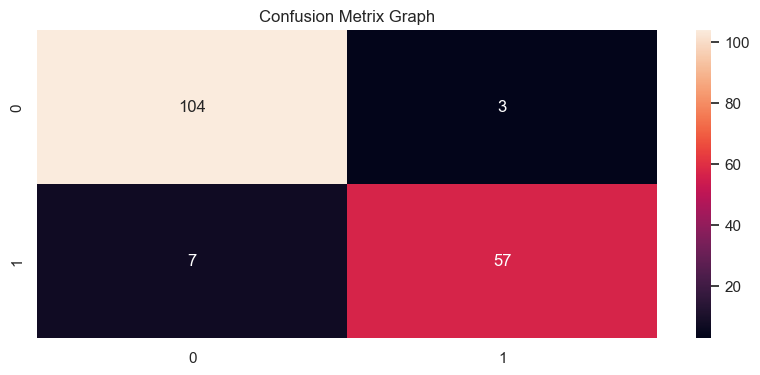

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize = (10,4))
plt.title("Confusion Metrix Graph")

for index, cm in enumerate(confusion_matrixs):
    plt.xlabel("Actual Negative/Positive")
    plt.ylabel("Predicted Negative/Positive")
    cm_metrix_graph(cm)
    plt.tight_layout(pad = True)

### K-Nearest Neighbor classification Model

#### Fitting K-NN classifier to the training set

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p =2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

#### Perform Cross_validation

In [43]:
from sklearn.model_selection import cross_val_score

neighbors = []
cv_score = []

# Perform 10-fold cross validation with k = 5 for knn

for k in range(1,15):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors= k,  metric = 'minkowski', p =2)
    scores = cross_val_score(
    knn, x_train, y_train, cv = 10, scoring = 'accuracy')
    cv_score.append(scores.mean())
    
    
scores = cross_val_score(knn, X, Y, cv = 10, scoring = 'accuracy')
print(scores)

[1.         0.92982456 0.94736842 0.92982456 0.9122807  0.94736842
 0.89473684 0.96491228 0.94736842 0.92857143]


#### Finding the optimal number of K neighbors

In [44]:
# Misclassification error versus k
MSE = [1 - x for x in cv_score]

# Determining the best k value
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of K neighbors = %d' %optimal_k)

The optimal number of K neighbors = 11


Text(0, 0.5, 'Misclassification Error')

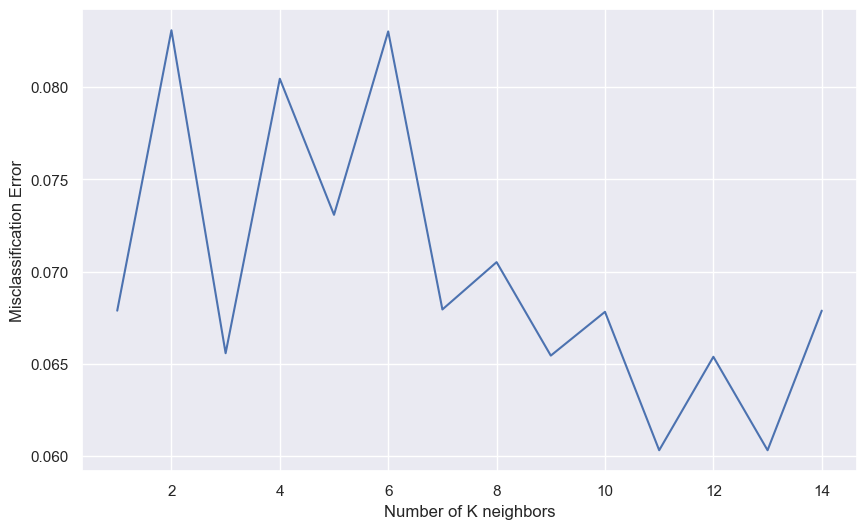

In [45]:
# Plot misclassification error vs k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of K neighbors')
plt.ylabel('Misclassification Error')

In [46]:
model =  KNeighborsClassifier(n_neighbors=11,  metric = 'minkowski', p =2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [47]:
y_knn_proba = model.predict_proba(x_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



#### Precision — The ability of a classifier not to label an instance positive that is actually negative.

#### Recall — The ability of a classifier to find all positive instances.
#### F1-score — A weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#### Support — The number of actual occurrences of the class in the specified dataset.


### Result Visualization

In [49]:
import scikitplot as skplt

##### Confusion Metrix

<Axes: title={'center': 'Confusion Matrix for K-nn'}, xlabel='Predicted label', ylabel='True label'>

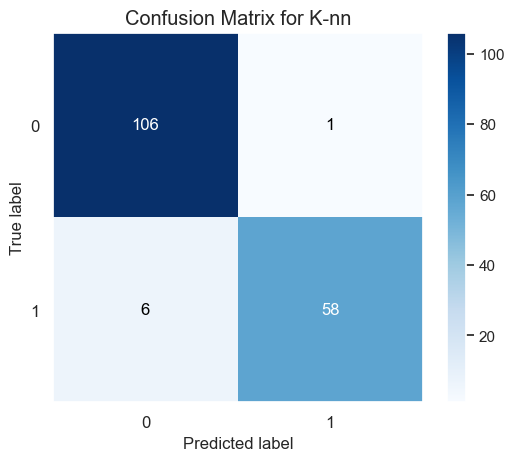

In [50]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, 
                                    normalize=False, title = 'Confusion Matrix for K-nn')

In [51]:
from sklearn.metrics import accuracy_score
print("Accuracy of brest cancer prediction using KNN : ", accuracy_score(y_test, y_pred) * 100)

Accuracy of brest cancer prediction using KNN :  95.90643274853801


##### Receiver Operating Characteristics (ROC) Curve

<Axes: title={'center': 'ROC Plot for KNN'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

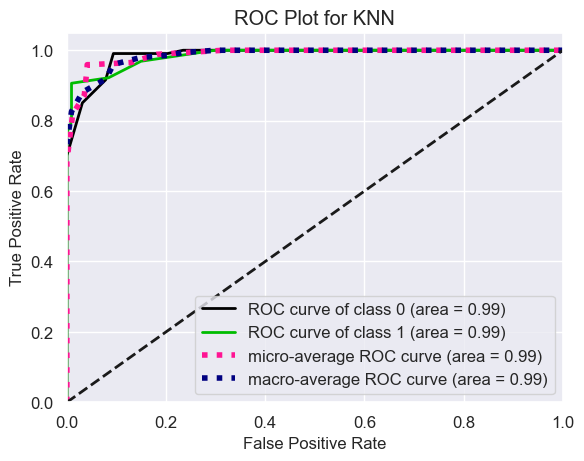

In [52]:
skplt.metrics.plot_roc(y_test, y_knn_proba, title = "ROC Plot for KNN")

##### Calibration Plot

<Axes: title={'center': 'Cumulative Gain for KNN'}, xlabel='Percentage of sample', ylabel='Gain'>

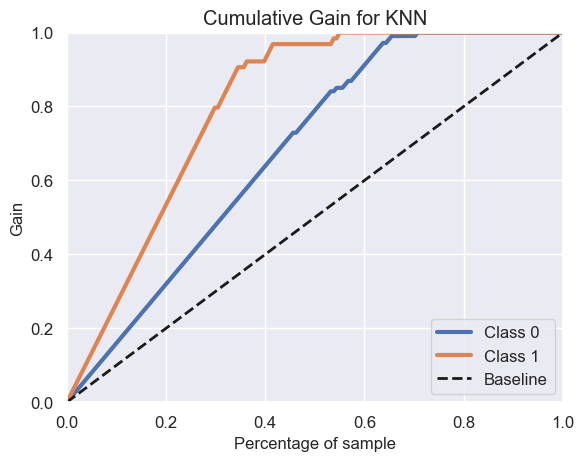

In [53]:
skplt.metrics.plot_cumulative_gain(y_test, y_knn_proba, title = "Cumulative Gain for KNN")

### CONCLUSION:
#### After the implementation and execution of the created machine learning model using the "K-Nearest Neighbor Classifier algorithm" gives the best accuracy score as 95.90%

#### The model gave this decent accuracy score when the optimal numbers of neighbors were 11, where the model was tested with the values in the range from 1 to 15 as the value of "K" or the number of neighbors
